# Decode neural dynamics related to motor task learning and performing

In this tutorial, we decode neural activities during the mouse learning and performaing a motor task of joystick pulling.

In [2]:
from autosort_neuron import *
import warnings
warnings.filterwarnings("ignore")

/n/holystore01/LABS/jialiu_lab/Users/yichunhe/AutoSort/autosort_neuron/sorting.py:19: DeprecationWarning: The 'toolkit' module is deprecated. Use spikeinterface.preprocessing/postptocessing/qualitymetrics instead
  import spikeinterface.toolkit as st


We first load the AutoSort sorting results.

In [3]:
save_pth = './AutoSort_data/'
day_pth = './processed_data/'
results_data_path =  f'./AutoSort_data/model_save/train_day0310_0/offline_result/0319/'
extremum_channels_ids_pth='./processed_data/Ephys_concat_0310_0315/mountainsort/extremum_channels_ids.csv'

(sorting,  
 trial_start, 
 trial_end,  
 cont_trigger_all_all,
 recording_cmr) = read_AutoSort_data('0319',
                                     day_pth,
                                     results_data_path, 
                                     save_pth=save_pth,
                                     extremum_channels_ids_pth=extremum_channels_ids_pth
                                     )  

0319 there are 28 trials at an interval of: 19383


The `trial_start` is the onset of mouse pulling. We extract the spike trains 1s before and 2s after the onset of mouse pulling.

In [4]:
num_trials = len(trial_start)
start_interval1 = 10000
start_interval2 = 20000
num_bins = 50
num_neurons=len(sorting.unit_ids)

start_time_point=0
end_time_point = cont_trigger_all_all.shape[0]

### get all raster data
onlinetraj_raster = np.zeros((end_time_point-start_time_point,len(sorting.unit_ids)))
for ind,i in tqdm(enumerate(sorting.unit_ids )):
    try:
        add_unit = list(sorting.get_unit_spike_train(i))
    except KeyError:
        continue
    onlinetraj_raster[add_unit,ind]=1

### remove the trials that are too close to the start and end of the recording
idx1 = trial_start>start_interval1
trial_start=trial_start[idx1]
trial_end=trial_end[idx1]

idx2 = trial_end<end_time_point-start_interval2
trial_start=trial_start[idx2]
trial_end=trial_end[idx2]    

data,spike_train = extract_trial_data(trial_start, 
                       trial_end, 
                       onlinetraj_raster, 
                       start_interval1, 
                       start_interval2,
                       num_neurons,
                       num_bins)

0it [00:00, ?it/s]

20it [00:00, 38.31it/s]


We can plot the spike trains of each neuron during each trial.

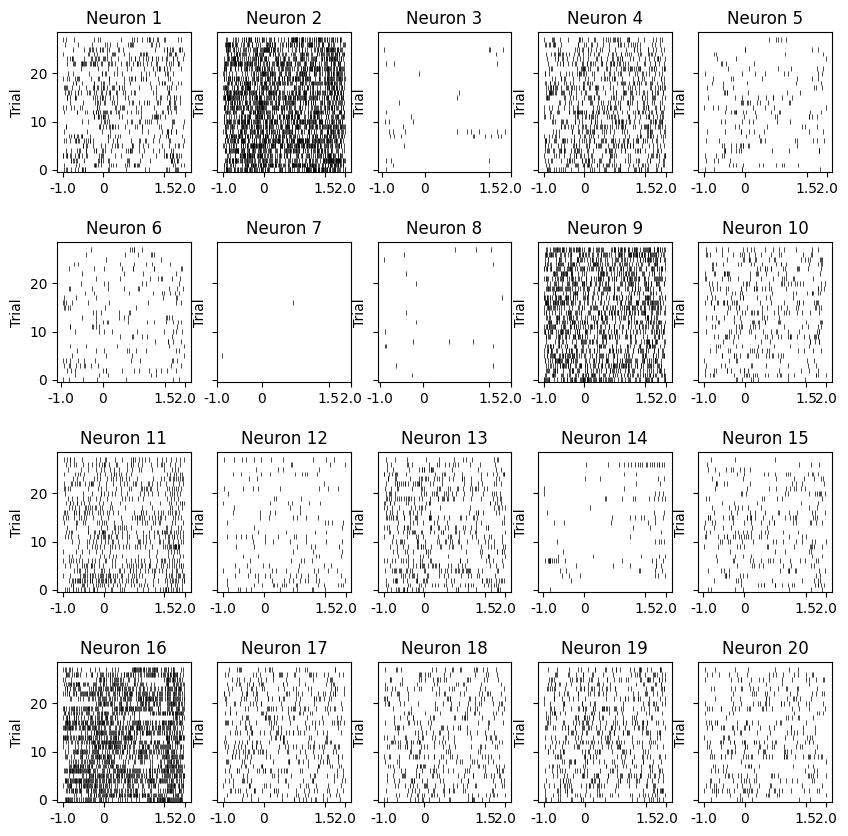

In [5]:
plot_neuron_spike_train(spike_train, 
                        num_trials, 
                        num_neurons, 
                        num_bins, 
                        start_interval1, start_interval2)    

We also have `data` as 28 trials x 50 time points per trial by 20 neurons.

We can decode neural dynamics with similarity matching algorithm.

SMA will reduce dimension to 3, generating a 3 dimensions by 50 time points by 28 trials matrix.

In [6]:
data_sma = SMA(data,num_bins)

100%|██████████| 1400/1400 [00:00<00:00, 37391.43it/s]


We plot the first PC1 trajectory of each trials on day 0319.

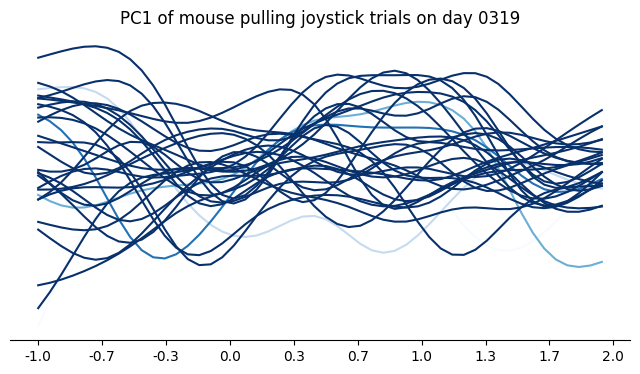

In [28]:
from matplotlib import cm

data = data_sma[0,:,:]

fig, ax = plt.subplots(figsize=(8,4))
cmap = cm.get_cmap('Blues', 5)  # Get 5 colors from the Blues colormap
for i in range(data.shape[1]):
    ax.plot(data[:, i], color=cmap(i), label=f'Line {i+1}')

original_ticks = np.linspace(0, 50, 10)  # Original ticks from 0 to 50
new_labels = np.linspace(-1, 2, 10)  # New labels from -1 to 2
ax.set_xticks(original_ticks)
ax.set_xticklabels([f'{label:.1f}' for label in new_labels])

ax.spines['left'].set_color('none') 
ax.set_yticks([])  
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.title('PC1 of mouse pulling joystick trials on day 0319')
plt.show()

Here, we also plot the first PC1 trajectory of each trials on day 0401.

In [12]:
### read pickle
with open(save_pth+'data_sma_0401.pkl', 'rb') as f:
    data_sma_0401 = pickle.load(f)

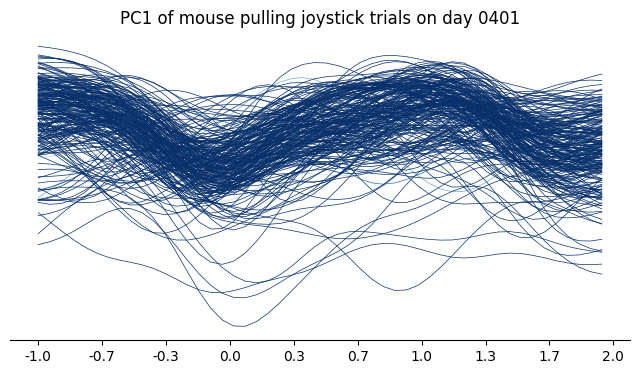

In [27]:
data = data_sma_0401[0,:,]

fig, ax = plt.subplots(figsize=(8,4))
cmap = cm.get_cmap('Blues', 5)  # Get 5 colors from the Blues colormap
for i in range(data.shape[1]):
    ax.plot(data[:, i], color=cmap(i), linewidth=0.5,label=f'Line {i+1}')

original_ticks = np.linspace(0, 50, 10)  # Original ticks from 0 to 50
new_labels = np.linspace(-1, 2, 10)  # New labels from -1 to 2
ax.set_xticks(original_ticks)
ax.set_xticklabels([f'{label:.1f}' for label in new_labels])

ax.spines['left'].set_color('none') 
ax.set_yticks([])  
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.title('PC1 of mouse pulling joystick trials on day 0401')
plt.show()

As comparison, more stable trajectory is observed on day 0401 compared to day 0319, showing that the mouse has transited from learning stage to skilled stage.